In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dropout

In [2]:
class_names=["uçak","otomobil","kuş","kedi","geyik","köpek","kurbağa","at","gemi","kamyon"]

In [3]:
(Xtrain,ytrain),(Xtest,ytest)=cifar10.load_data()

In [4]:
Xtrain=Xtrain/255    #data normalize -> squeeze 0-1
Xtest=Xtest/255

In [5]:
ytrain=ytrain.flatten()

In [6]:
ytrain

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
ytest=ytest.flatten()

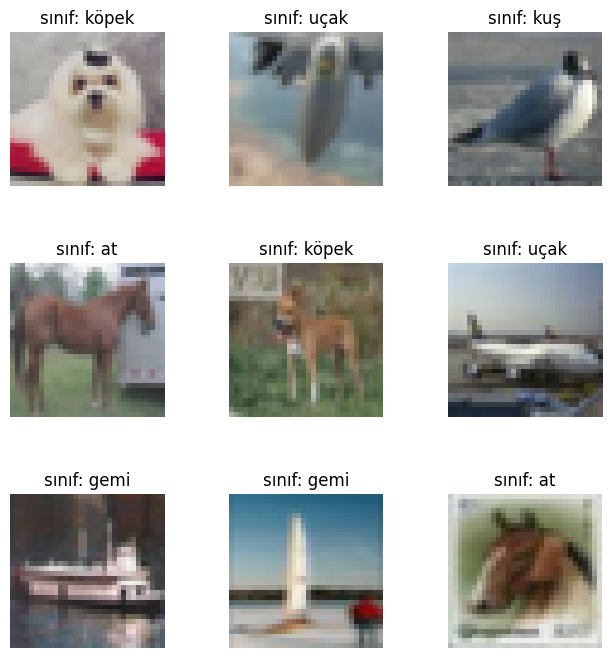

In [8]:
fig,axes=plt.subplots(nrows=3, ncols=3,figsize=(8,8))
axes=axes.flatten()
selected_indicates=np.random.randint(0,len(Xtrain),size=9)
for i in range(9):
    index=selected_indicates[i]
    img=Xtrain[index]
    label=class_names[ytrain[index]]
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"sınıf: {label}")
plt.subplots_adjust(hspace=0.5)
plt.show()

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))  # Apply a filter that moves over the image 32 times with a 3x3 window. (32,32,3) specifies that the image is 3-colored (RGB).
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))  # Use dropout to prevent overfitting.

model.add(Conv2D(64, (3, 3), activation="relu"))  # No need to specify the input shape again.
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="relu"))  # Create 64 neurons in a row and pass the flattened image through the artificial neural network.
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

In [10]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")    #karışık verilerde RMSProp kullanabilirisn optimizer olarak.. çoklu sınıflandırma categorical cross entropy kullan ikili sınıflandırmada binary cross entropy

In [11]:
model.summary()   # (kernel size*rgb+bias)*conv.layer   -> ((3*3*3)+1)*32

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [ ]:
history = model.fit(Xtrain,ytrain,epochs=80,batch_size=16,validation_split=0.2)  #batch size ne kadar büyük olursa model o kadar hızlı öğrenir ne kadar küçük olursa o kadar yavaş ama detaylı öğrenir

In [ ]:
#!!!!validation ve accuracy değerlerinde çok fark olsaydı model ezberlemeye başladı demektir diğer örnekte var!!!

In [ ]:
plt.plot(history.history["accuracy"],label="eğitim durumu") #oluşturulan history nesnesi içindeki history fonksiyonunu kulllanıyoruz
plt.plot(history.history["val avvuracy"])
plt.xlabel("epochs")
plt.ylabel("doğruluk")
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history["loss"],label="loss durumu") #oluşturulan history nesnesi içindeki history fonksiyonunu kulllanıyoruz
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")   #gerçek değer-tahmin edilen değer   lossun artıp azalmasının sebebi aktivayson fonkları güncellendikçe bazen daha kötüye de gidip sonra toparlayabiliyor
plt.legend()
plt.show()

In [ ]:
#loss= train verileirnin gerçek değerler-tahmin değerleri
#val_loss= eğitim aşamasında model üzerinde yaptığı testlerin sonucu

In [ ]:
test_images=[]
test_images.append(load_img("k1.jpg",target_size=(32,32)))
test_images.append(load_img("k2.jpg",target_size=(32,32)))
test_image=np.array([img_to_array(img) for img in test_images])
test_image=test_image/255

In [ ]:
results=model.predict(test_image)
for result in results:
    print("predicted class: ",class_names[np.argmax(result)])    #her bir class için bir probabalistic bir değer oluşturuyor en yüksek olan sonucu getir diyoruz aslında

In [ ]:
prediction_classes=[class_names[np.argmax(result)] for result in results]
fig,ax=plt.subplots(1,2)
ax[0].imshow(load_img("k3.jpg"))
ax[0].set_title(f"predicted class: {prediction_classes[0]}")

ax[1].imshow(load_img("k4.jpg"))
ax[1].set_title(f"predicted class: {prediction_classes[1]}")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ypred=model.predict(Xtest)
ypred_classes=np.argmax(ypred,axis=1)
cm=confusion_matrix(ytest,ypred_classes)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix")
plt.show()